In [12]:
import json
import math
import numpy as np
import regex as re
import seaborn as sns
from collections import Counter
from nltk.util import bigrams
from nltk.lm.preprocessing import pad_both_ends 
from nltk.util import everygrams
from nltk.lm.preprocessing import flatten, padded_everygram_pipeline, padded_everygrams
from nltk.util import ngrams
from nltk.lm import NgramCounter, MLE
from nltk.lm import KneserNeyInterpolated, Laplace, Lidstone, StupidBackoff
from functions import preprocess, preprocess_tweet
from tqdm import tqdm
import pandas as pd

In [13]:
with open("tweeteval/datasets/irony/train_text.txt", "r", encoding="utf8") as f:
    irony = preprocess(f.read())
with open("tweeteval/datasets/stance/feminist/train_text.txt", "r", encoding="utf8") as f:
    stance_feminist = preprocess(f.read())
with open("pattern.txt", "r") as f:
    pat = re.compile(f.read())
#with open('broad_tweet_g.json','r', encoding="utf8") as f:
    #broad_tweets = [preprocess_tweet(d["text"]) for d in json.load(f)]
with open("tweeteval/datasets/offensive/train_text.txt", "r", encoding="utf8") as f:
    offensive_train = preprocess(f.read())
with open("tweeteval/datasets/offensive/val_text.txt", "r", encoding="utf8") as f:
    offensive_val = preprocess(f.read())
offensive = np.concatenate((offensive_train, offensive_val))

#broad_tweets = list(set([tweet for tweet in broad_tweets if "we have changed our username to" not in tweet]))
irony_tokens = [re.findall(pat, tweet) for tweet in irony]
#broad_tweets_tokens = [re.findall(pat, tweet) for tweet in broad_tweets]
offensive_tokens = [re.findall(pat, tweet) for tweet in offensive]

(1325,)

100%|██████████| 13242/13242 [00:34<00:00, 379.36it/s]


<AxesSubplot:ylabel='Density'>

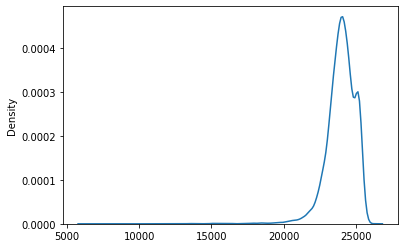

In [21]:
_, vocab = padded_everygram_pipeline(2, irony_tokens + offensive_tokens)
train, _ = padded_everygram_pipeline(2, irony_tokens)
lm = Lidstone(0.2, 2)
lm.fit(train, vocab)
perplexities = []
!rm perp_log.txt
!touch perp_log.txt
def log(perp):
    with open("perp_log.txt", "a") as f:
        f.write(str(perp) + "\n")
ngrams_linewise = list(bigrams(tweet) for tweet in offensive)
for tweet in tqdm(ngrams_linewise):
    try:
        perplexity = lm.perplexity(tweet)
        perplexities.append(perplexity)
        log(perplexity)
    except ZeroDivisionError:
        perplexity = math.inf
        perplexities.append(perplexity)
        log(perplexity)
sns.kdeplot(perplexities)
# print(np.array(perplexities)[np.argsort(perplexities)][-100:])

In [24]:
with open("tweeteval/datasets/irony/train_text.txt", "r", encoding="utf8") as f:
    irony = preprocess(f.read())
with open("tweeteval/datasets/stance/feminist/train_text.txt", "r", encoding="utf8") as f:
    stance_feminist = preprocess(f.read())
with open("pattern.txt", "r") as f:
    pat = re.compile(f.read())
with open("tweeteval/datasets/offensive/train_text.txt", "r", encoding="utf8") as f:
    offensive_train = preprocess(f.read())
with open("tweeteval/datasets/offensive/val_text.txt", "r", encoding="utf8") as f:
    offensive_val = preprocess(f.read())
offensive = np.concatenate((offensive_train, offensive_val))

irony_tokens = [re.findall(pat, tweet) for tweet in irony]
offensive_tokens = [re.findall(pat, tweet) for tweet in offensive]
_, vocab = padded_everygram_pipeline(2, irony_tokens + offensive_tokens)
train, _ = padded_everygram_pipeline(2, irony_tokens)
lm = Lidstone(0.2, 2)
lm.fit(train, vocab)
perplexities = []
!rm perp_log.txt
!touch perp_log.txt
ngrams_linewise = list(bigrams(tweet) for tweet in offensive)
for tweet in tqdm(ngrams_linewise):
    try:
        perplexity = lm.perplexity(tweet)
        perplexities.append(perplexity)
    except ZeroDivisionError:
        perplexity = math.inf
        perplexities.append(perplexity)
df = pd.DataFrame(data = {"index": [i for i in range(len(perplexities))], "perp": perplexities})
df = df.sort_values(by="perp")
index = df["index"].tolist()
tweets_for_aug = [offensive[i] for i in index]

rm: cannot remove 'tweets_for_aug/tweets_for_aug_100.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_200.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_300.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_400.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_500.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_1000.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_1500.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_2000.txt': No such file or directory
rm: cannot remove 'tweets_for_aug/tweets_for_aug_2500.txt': No such file or directory


In [11]:
input_1 = 'STOP'

100%|██████████| 13242/13242 [00:34<00:00, 383.07it/s]


<AxesSubplot:ylabel='Density'>

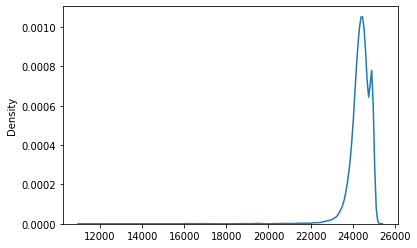

In [20]:
_, vocab = padded_everygram_pipeline(2, irony_tokens + offensive_tokens)
train, _ = padded_everygram_pipeline(2, irony_tokens)
lm = Laplace(2)
lm.fit(train, vocab)
perplexities = []
!rm perp_log.txt
!touch perp_log.txt
def log(perp):
    with open("perp_log.txt", "a") as f:
        f.write(str(perp) + "\n")
ngrams_linewise = list(bigrams(tweet) for tweet in offensive)
for tweet in tqdm(ngrams_linewise):
    try:
        perplexity = lm.perplexity(tweet)
        perplexities.append(perplexity)
        log(perplexity)
    except ZeroDivisionError:
        perplexity = math.inf
        perplexities.append(perplexity)
        log(perplexity)
sns.kdeplot(perplexities)
# print(np.array(perplexities)[np.argsort(perplexities)][-100:])

In [19]:
type(o)

list

In [ ]:
def train_model(dataset, n):
    _, vocab = padded_everygram_pipeline(2, all_tokens)
    grams = list(flatten(ngrams(sentence, n) for sentence in dataset))
    print(f"Length of {n}-gram list: {len(grams)}")
    train, _ = padded_everygram_pipeline(2, dataset)
    lm = MLE(n)
    lm.fit(train, vocab)
    return lm

In [ ]:
all_tokens = irony_tokens + broad_tweets_tokens
lm = train_model(irony_tokens,1)
test = list(flatten(everygrams(sent, 2, 2) for sent in broad_tweets_tokens))

Length of 1-gram list: 40588


In [ ]:
test_set = set()
for line in test:
    perp = lm.perplexity(line)
    test_set.add(perp)
print(test_set)

{8455.740842764752, 1543.799999999999, 1544.6583820513138, 3211.2981109969096, 3859.5000000000055, 4376.261650737336, 668.485009181209, 5789.250000000001, 5277.970138151672, 6302.537108181123, 2989.5558449375044, inf, 57.89250000000002, 836.4234805094575, 5700.859313216823, 3143.999182115489, 15438.000000000022, 334.2425045906041, 12377.937157932018, 3040.663065732595, 17505.046602949344, 4456.566727874725, 1129.2739125473706, 46314.00000000001, 362.181991221494, 8187.235865968441, 5244.027855937287}


In [ ]:
test

[('millions', 'of'),
 ('of', 'family-run'),
 ('family-run', '#farms'),
 ('#farms', 'hold'),
 ('hold', 'the'),
 ('the', 'key'),
 ('key', 'to'),
 ('to', 'global'),
 ('global', '#hunger'),
 ('#hunger', 'reveals'),
 ('reveals', '#un'),
 ('#un', 'report'),
 ('report', '@link'),
 ('cousin', 'of'),
 ('of', 'reeva'),
 ('reeva', 'steenkamp'),
 ('steenkamp', 'says'),
 ('says', '#pistorius'),
 ('#pistorius', 'should'),
 ('should', 'pay'),
 ('pay', 'for'),
 ('for', 'what'),
 ('what', 'he'),
 ('he', 'has'),
 ('has', 'done'),
 ('done', '@link'),
 ('icymi', '@user'),
 ('@user', 'has'),
 ('has', 'put'),
 ('put', 'together'),
 ('together', 'this'),
 ('this', '@user'),
 ('@user', 'magazine'),
 ('magazine', 'for'),
 ('for', 'their'),
 ('their', 'program'),
 ('program', 'fat'),
 ('fat', 'chance'),
 ('chance', '@link'),
 ('@link', '@link'),
 ('returning', 'to'),
 ('to', 'kobane'),
 ('kobane', 'woman'),
 ('woman', 'fleeing'),
 ('fleeing', 'islamic'),
 ('islamic', 'state'),
 ('state', 'detained'),
 ('detaine

# 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4cdc3a5-dd4a-4d72-a71a-972cea883107' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>